<a href="https://colab.research.google.com/github/nihermann/Pokemaenner/blob/main/Pookemaenner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import torch
import pathlib
import re
import torchvision
import torchvision.transforms as transforms
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


####Load the stats and shape dataset with all information on the available pokemon (to later categorize them via type) 

In [10]:
stats = pd.read_csv('/content/gdrive/MyDrive/pokedex_(Update_05.20).csv')
shapes_data = pd.read_csv('/content/gdrive/MyDrive/pokemaenner/pokemon_by_shape.csv')
shapes_data

,pokemon,shapes
0,shellder,only_head
1,cloyster,only_head
2,gastly,only_head
3,voltorb,only_head
4,electrode,only_head
...,...,...
914,tapu_bulu,head_and_arms
915,tapu_fini,head_and_arms
916,necrozma,head_and_arms
917,cursola,head_and_arms


In [11]:
names_to_numbers = pd.Series(stats.pokedex_number.values,index=stats.name).to_dict() #to get the pokedex numbers of a pokemon 
numbers_to_names = pd.Series(stats.name,index=stats.pokedex_number.values).to_dict() #to get the corresponding pokemon name from a pokedex number

names_to_shape = pd.Series(shapes_data.shapes.values , shapes_data.pokemon.values).to_dict() #to get the shape of a pokemon

####Load the image data


In [15]:
images_old_list = []
images_new_list = []
images_old_names = []
images_new_numbers = []

#get the pokemon names of the images in the images folder
for root, dirs, files in os.walk("/content/drive/MyDrive/images/", topdown=False):
   for name in files:
      images_old_names.append(name[:-4].capitalize())


#get the pokemon numbers of the images in the pokemon folder
for root, dirs, files in os.walk("/content/drive/MyDrive/pokemon/", topdown=False):
   for name in files:
      images_new_numbers.append( re.findall("\d+", name[:3])[0])

for name in images_old_names:
  try:
    images_old_list.append([stats_dictionary_names_to_numbers[name],name])
  except:
    pass

for number in images_new_numbers:
  try:
    images_new_list.append([number,stats_dictionary_numbers_to_names[int(number)]])
  except:
    pass


In [16]:
# loads the data and transforms it and returns both data, dataloader and their dataiterater
def load_image_data(path, batchsize = 32, shuffle = True, num_workers = 2):
  # define transformation that you wish to apply on image
  data_transforms = transforms.Compose([
                    transforms.Resize((256,256)),
                    transforms.ToTensor()])
  
  #load the data with the given path
  data =  torchvision.datasets.ImageFolder(root= path, transform = data_transforms)
  
  # Using the image datasets and the transforms, define the dataloaders
  dataloader = torch.utils.data.DataLoader(data, batch_size=batchsize, shuffle=shuffle, num_workers=num_workers)
  return data, dataloader, iter(dataloader)

In [18]:
images_new, dataloader_new, dataiter_new = load_image_data("/content/gdrive/MyDrive/pokemaenner/pokemon_new")
images_old, dataloader_old, dataiter_old = load_image_data("/content/gdrive/MyDrive/pokemaenner/pokemon_old")

In [19]:
images_alternative, dataloader_alternative, dataiter_alternative = load_image_data("/content/gdrive/MyDrive/pokemaenner/pokemon_alternative_artwork")
images_sprites, dataloader_sprites, dataiter_sprites = load_image_data("/content/gdrive/MyDrive/pokemaenner/pokemon_sprites")

In [20]:
def imshow(img):
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

def show_images(dataiter, n_images = 20, rows = 1):
    #for better formatting
    while n_images % rows != 0: n_images +=1

    images, _ = dataiter.next()
    images = images.numpy() #convert the images to numpy for display

    #plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(25,4))

    #display n images
    for idx in np.arange(n_images):
      ax = fig.add_subplot(rows, n_images/rows, idx +1, xticks=[], yticks=[] )
      imshow(images[idx])

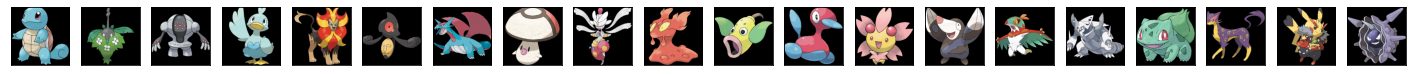

In [21]:
#show images of the new image dataset
show_images(dataiter_new, 20)

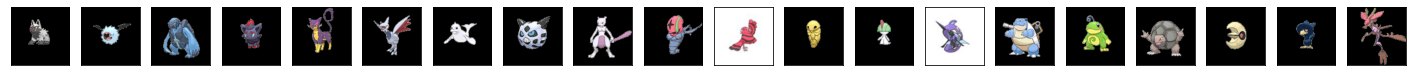

In [22]:
#show images of the old image dataset
show_images(dataiter_old, 20)

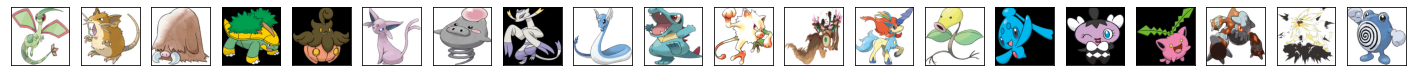

In [23]:
#show images of the alternative image dataset
show_images(dataiter_alternative, 20)

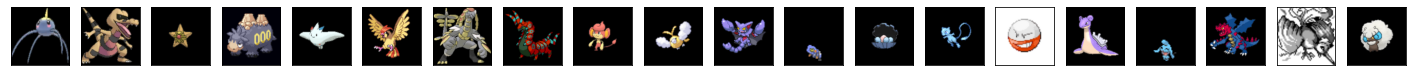

In [24]:
#show images of the sprites  image dataset
show_images(dataiter_sprites, 20)